# YOLO V3 with CV2 Python implementation
check the https://pjreddie.com/darknet/yolo/

In [29]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

In [2]:
print (cv2.__version__)

4.1.2


In [3]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5931, done.
remote: Total 5931 (delta 0), reused 0 (delta 0), pack-reused 5931
Receiving objects: 100% (5931/5931), 6.34 MiB | 19.16 MiB/s, done.
Resolving deltas: 100% (3924/3924), done.


In [4]:
!cd darknet

In [6]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2021-01-25 11:29:17--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  4.56MB/s    in 81s     

2021-01-25 11:30:39 (2.90 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [8]:
!cp /content/darknet/data/coco.names coco.names

In [9]:
weightsPath = "yolov3.weights"
configPath = "darknet/cfg/yolov3.cfg"

In [10]:
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

In [11]:
ln = net.getLayerNames()
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]

In [61]:
image = cv2.imread('table.jpg')

In [15]:
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)

In [16]:
net.setInput(blob)

In [17]:
layerOutputs = net.forward(ln)

In [18]:
boxes = []
confidences = []
classIDs = []

In [23]:
H, W = image.shape[0], image.shape[1]

In [24]:
for output in layerOutputs:
    for detection in output:
      scores = detection[5:]
      classID = np.argmax(scores)
      confidence = scores[classID]
      box = detection[0:4] * np.array([W, H, W, H])
      (centerX, centerY, width, height) = box.astype("int")
      x = int(centerX - (width / 2))
      y = int(centerY - (height / 2))
      boxes.append([x, y, int(width), int(height)])
      confidences.append(float(confidence))
      classIDs.append(classID)

In [25]:
idxs = cv2.dnn.NMSBoxes(boxes, confidences, 0.6,0.2)

In [50]:
classes=[]
with open("coco.names") as f:
  for line in f.readlines():
    classes.append(line.strip())

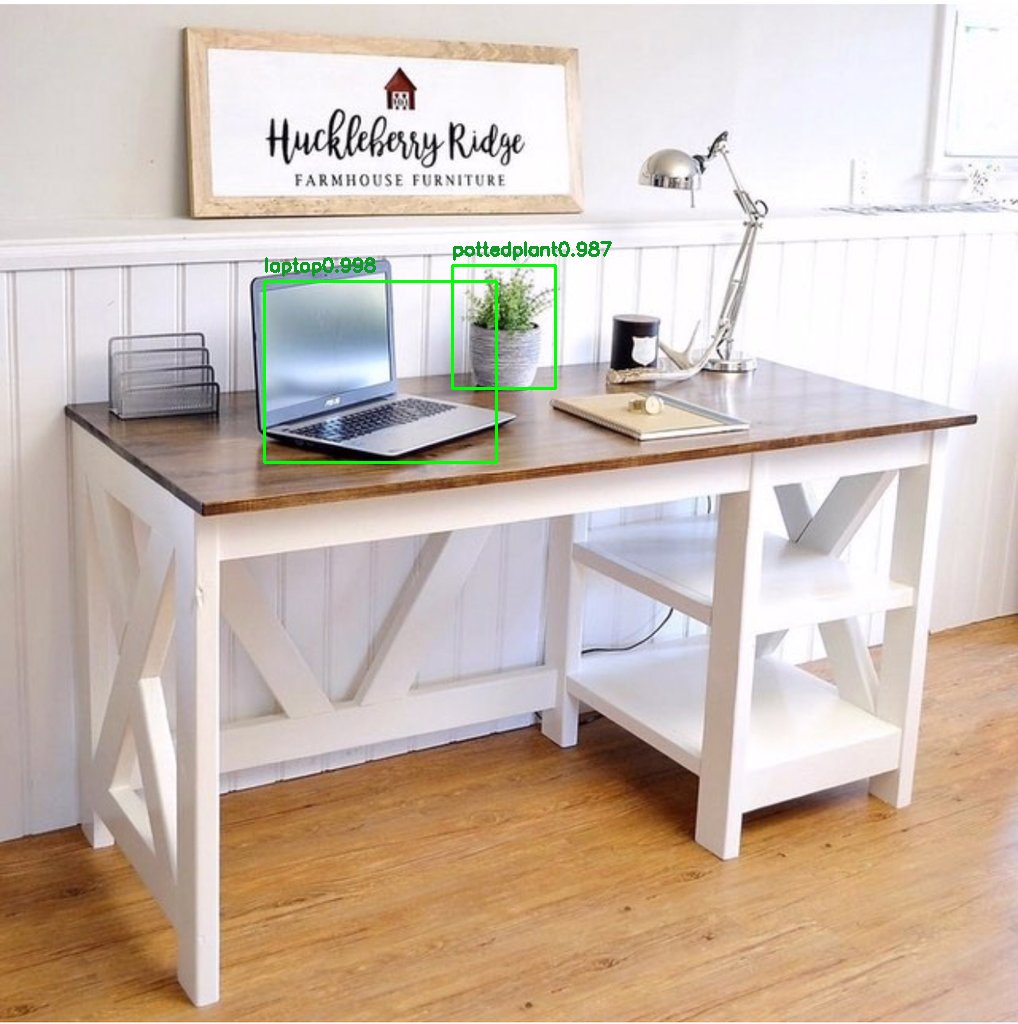

In [66]:
image = cv2.imread('table.jpg')
for i in idxs.flatten():
        # extract the bounding box coordinates
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        cl = classes[classIDs[i]]
        conf = round(confidences[i], 3)
        t = cl + str(conf)
        cv2.putText(image, t, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (36,155,12), 2)
cv2_imshow(image)
cv2.waitKey()  
cv2.destroyAllWindows()